In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # Specify the default font  
plt.rcParams['axes.unicode_minus']=False    #Solve the problem where the minus sign '-' is displayed as a square

In [3]:
data = pd.read_excel('data/clean_beautyProducts.xlsx')
data.head()

,update_time,id,title,price,sale_count,comment_count,店名,sub_type,main_type,是否男士专用,销售额,day
0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719,2704,自然堂,面霜类,护肤品,否,3713941.0,14
1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122,1492,自然堂,乳液类,护肤品,否,1575668.0,14
2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668,589,自然堂,化妆水,护肤品,否,1254132.0,14
3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805,4287,自然堂,清洁类,护肤品,是,980590.0,14
4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196,618,自然堂,面霜类,护肤品,否,722244.0,14


# 1. Analyze the number of SKUs for each brand

In [5]:
# Convert time format
data['update_time'] = pd.to_datetime(data['update_time'])
# Check
data['update_time']

0       2016-11-14
1       2016-11-14
2       2016-11-14
3       2016-11-14
4       2016-11-14
           ...    
27507   2016-11-05
27508   2016-11-05
27509   2016-11-05
27510   2016-11-05
27511   2016-11-05
Name: update_time, Length: 27512, dtype: datetime64[ns]

In [6]:
data = data.set_index('update_time')

In [7]:
data.columns

Index(['id', 'title', 'price', 'sale_count', 'comment_count', '店名', 'sub_type',
       'main_type', '是否男士专用', '销售额', 'day'],
      dtype='object')

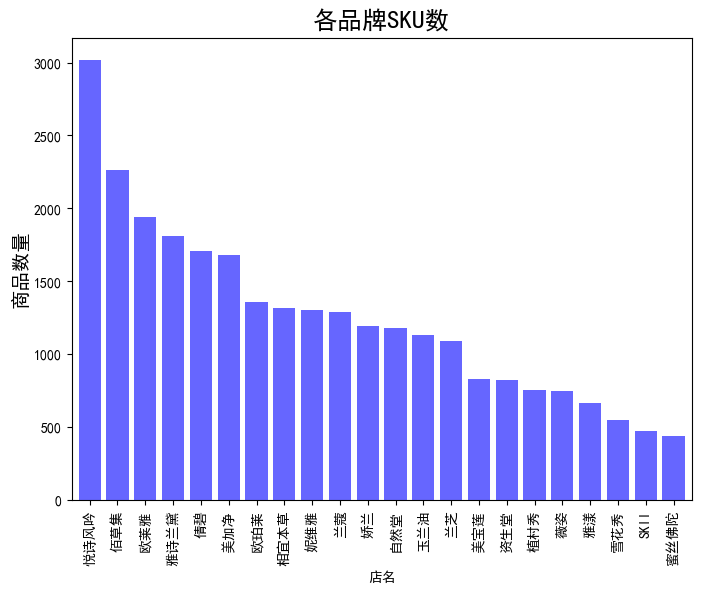

In [8]:
# Define the canvas
plt.figure(figsize=(8,6))
# Calculate the number of products in each store
data['店名'].value_counts().sort_values(ascending=False).plot(kind = 'bar', width=0.8, alpha=0.6, color='b')
# Define the chart title
plt.title('各品牌SKU数',fontsize=18)
# Display y-axis labels
plt.ylabel('商品数量',fontsize=14)
# Finally display the chart
plt.show()

# 2. Total sales volume and total sales revenue of the brand

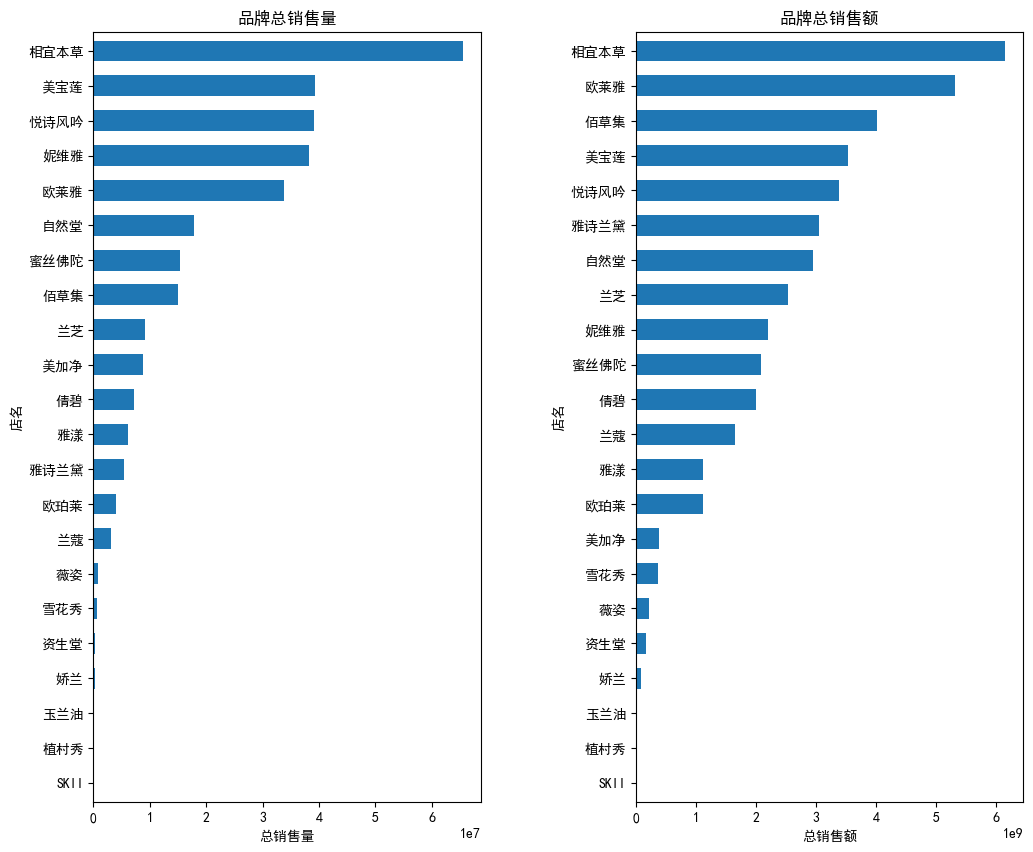

In [9]:
# Define the canvas (a canvas area with 1 row and 2 columns is defined)
fig,axes = plt.subplots(1,2,figsize=(12,10))
# Set the content of the first canvas
# First, group the stores by name, then sum the sales volume within each group and sort them in descending order.
ax1 = data.groupby('店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',ax=axes[0],width=0.6)
# Set the chart title
ax1.set_title('品牌总销售量',fontsize=12)
# Set the chart's x-axis labels
ax1.set_xlabel('总销售量')

# Set the content of the second canvas 
# Same as the above operation
ax2 = data.groupby('店名')['销售额'].sum().sort_values(ascending=True).plot(kind='barh',ax=axes[1],width=0.6)
ax2.set_title('品牌总销售额',fontsize=12)
ax2.set_xlabel('总销售额')
plt.subplots_adjust(wspace=0.4)
# Display the chart
plt.show()

# 3. The sales volume and sales amount of various categories

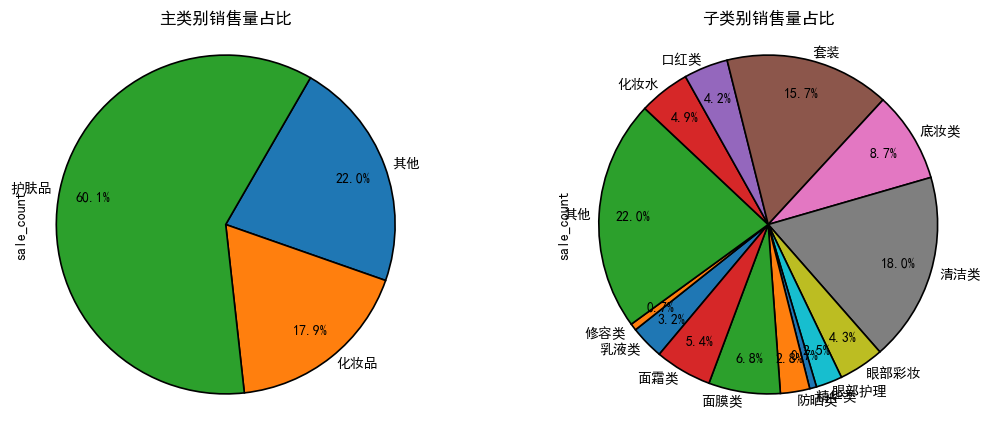

In [10]:
# 1. Prepare the canvas
fig,axes = plt.subplots(1,2,figsize=(12,5))
# 2. Obtain the data required for the display of the first canvas 
#    (calculate the sum of sales volumes for each main category)
data1 = data.groupby('main_type')['sale_count'].sum()
# 3. Define the chart display of the first canvas
ax1 = data1.plot(kind='pie',ax=axes[0],autopct='%.1f%%', # Format the percentage, keeping one decimal place here      
                 pctdistance=0.8, # Set the distance between the percentage label and the center of the circle
                 labels= data1.index, # Define tags
                 labeldistance = 1.05, # Set the distance between the label and the center of the circle
                 startangle = 60, # Set the initial angle of the pie chart
                 radius = 1.1, # Set the radius of the pie chart
                 counterclock = False, # Is it counterclockwise? It is set to clockwise here.
                 wedgeprops = {'linewidth': 1.2, 'edgecolor':'k'}, # Set the attribute values of the inner and outer boundaries of the pie chart
                 textprops = {'fontsize':10, 'color':'k'}, # Set the attribute value of the text tag
)
# 4. Define the title of the first canvas
ax1.set_title('主类别销售量占比',fontsize=12)

# 5. Obtain the data required for the display of the second canvas (calculate the sum of sales volume for each subclass)
data2 = data.groupby('sub_type')['sale_count'].sum()
# 6. Define the chart display of the second canvas
ax2 = data2.plot(kind='pie',ax=axes[1],autopct='%.1f%%', 
                 pctdistance=0.8, 
                 labels= data2.index,
                 labeldistance = 1.05,
                 startangle = 230, 
                 radius = 1.1, 
                 counterclock = False, 
                 wedgeprops = {'linewidth': 1.2, 'edgecolor':'k'},
                 textprops = {'fontsize':10, 'color':'k'}, 
)
# 7. define the title of the second canvas
ax2.set_title('子类别销售量占比',fontsize=12)
# 8. set the horizontal spacing between the two canvases
plt.subplots_adjust(wspace=0.4)
# 9. display the chart
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20088\500871841.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='店名',y='sale_count',hue='main_type',data=data,saturation=0.75,ci=0)


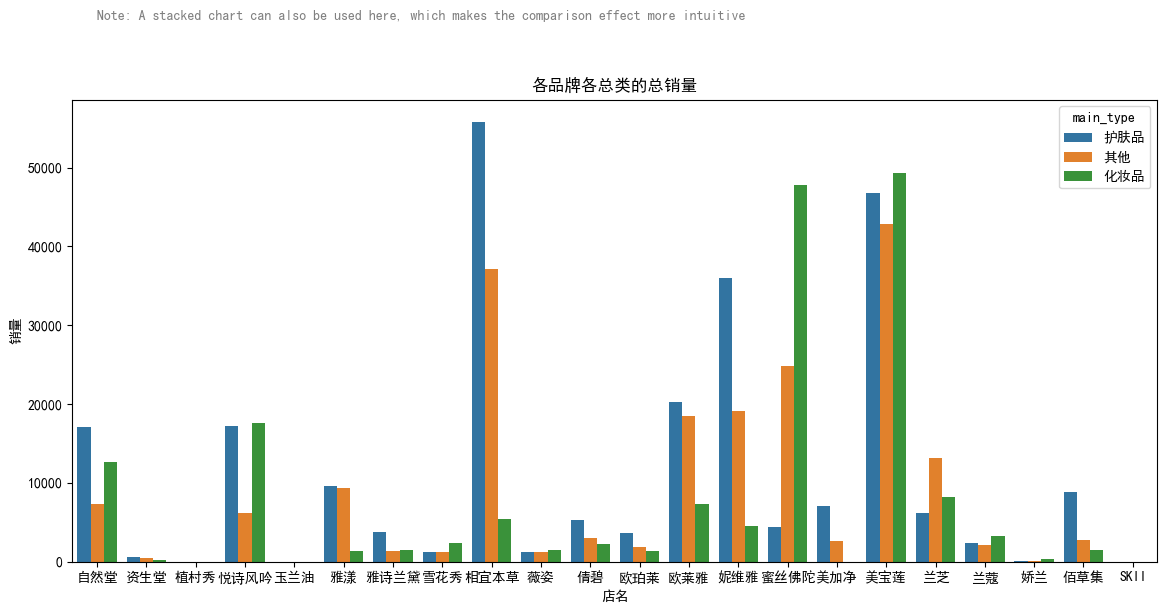

In [13]:
# Analyze the total sales volume of each category of each brand
plt.figure(figsize=(14,6))
sns.barplot(x='店名',y='sale_count',hue='main_type',data=data,saturation=0.75,ci=0)
plt.title('各品牌各总类的总销量')
plt.ylabel('销量')
plt.text(0,70000,'Note: A stacked chart can also be used here, which makes the comparison effect more intuitive',
         verticalalignment='top', horizontalalignment='left',color='gray', fontsize=10)
plt.show()

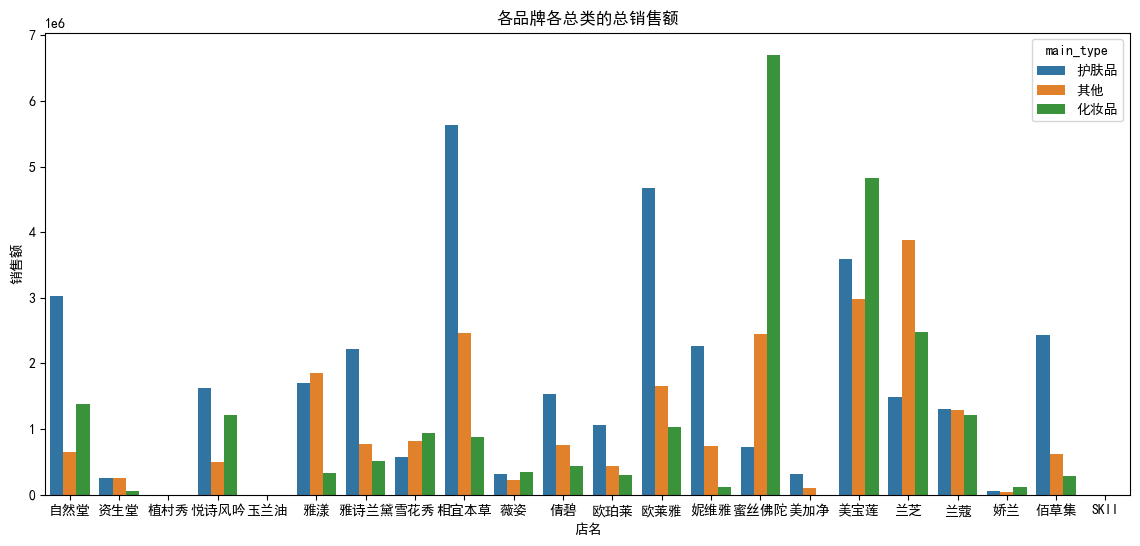

In [17]:
# Total sales revenue
plt.figure(figsize = (14,6))
sns.barplot( x = '店名',y = '销售额',hue = 'main_type',data =data,saturation = 0.75,errorbar=('ci', 0))
plt.title('各品牌各总类的总销售额')
plt.ylabel('销售额')
plt.show()

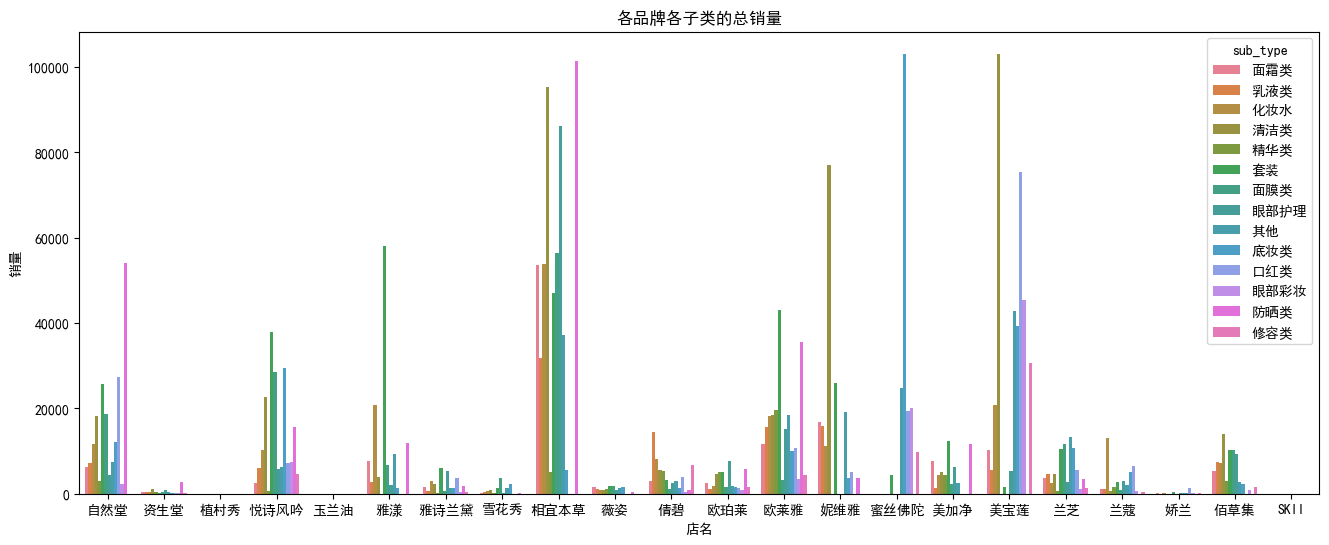

In [20]:
plt.figure(figsize = (16,6))
sns.barplot( x = '店名',y = 'sale_count',hue = 'sub_type',data =data,saturation = 0.75,errorbar=('ci', 0))
plt.title('各品牌各子类的总销量')
plt.ylabel('销量')
plt.show()

# 4. Popularity of various brands

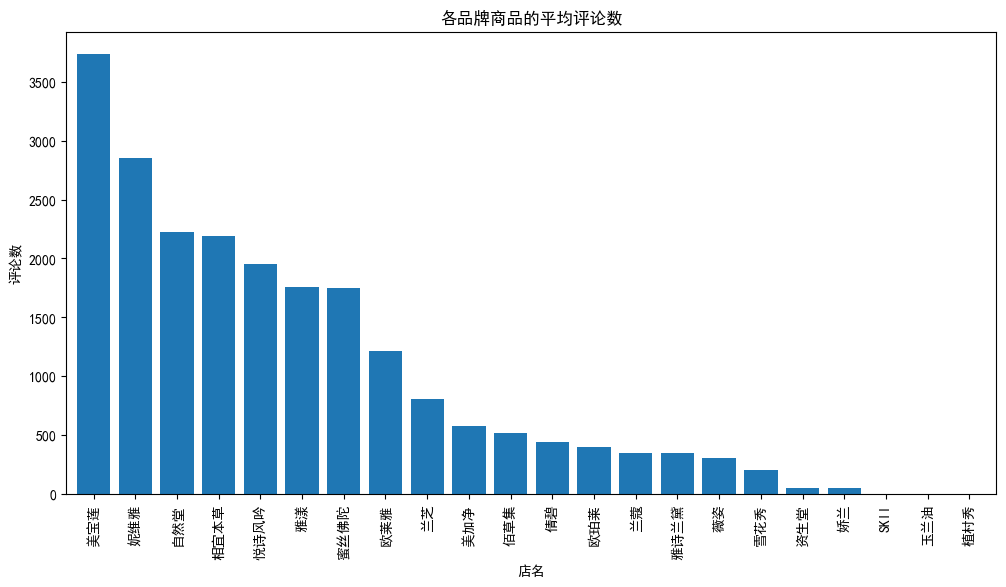

In [21]:
# Judge people's attention to a brand based on the number of reviews of each brand.
plt.figure(figsize = (12,6))
data.groupby('店名').comment_count.mean().sort_values(ascending=False).plot(kind='bar',width=0.8)
plt.title('各品牌商品的平均评论数')
plt.ylabel('评论数')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20088\733342804.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt[i],xy=(x[i],y[i]))


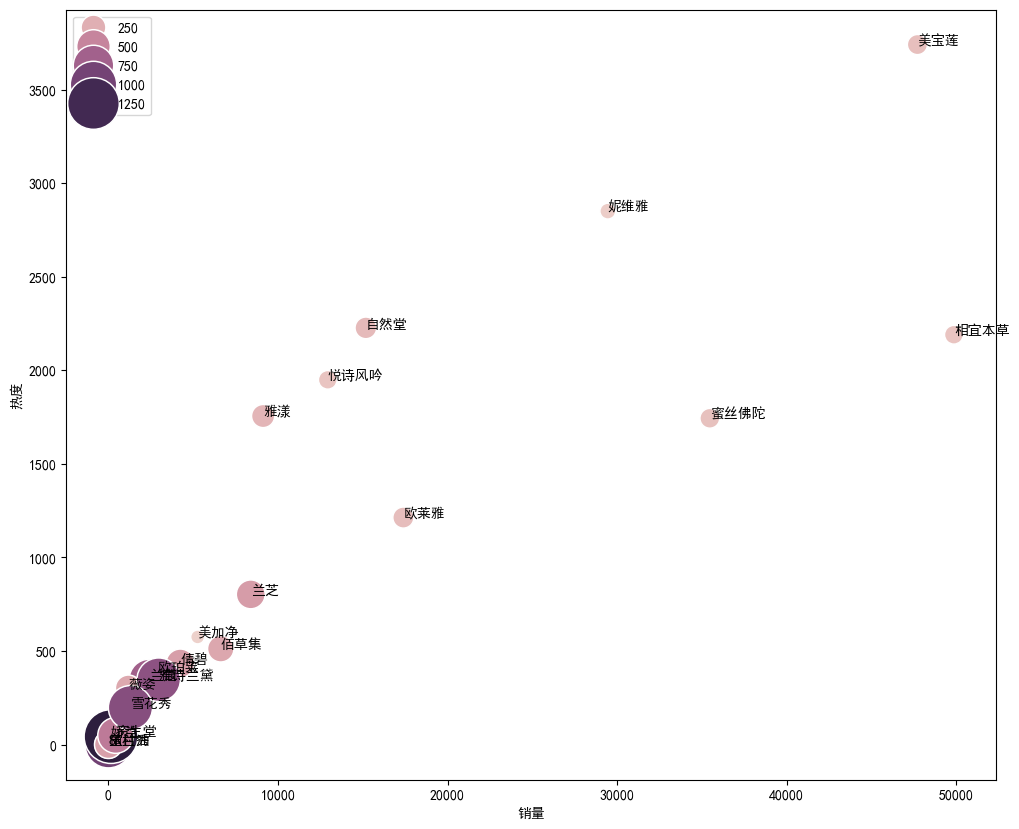

In [26]:
# Use a scatter plot to understand the relationship between a store's sales volume, reviews, price, and popularity.
# Canvas
plt.figure(figsize=(12,10))
# Average sales volume of each store
x = data.groupby('店名')['sale_count'].mean()
# Average number of reviews per store
y = data.groupby('店名')['comment_count'].mean()
# Average price of goods in each store
s = data.groupby('店名')['price'].mean()
# Reindex the number of each store
txt = data.groupby('店名').id.count().index
# Use a scatter plot to display the data
sns.scatterplot(x=x.values, y=y.values, size=s, hue=s, sizes=(100,1500))
# Provide auxiliary functions using plt's annotate() method for annotation.
for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x[i],y[i]))
# tag   
plt.ylabel('热度')
plt.xlabel('销量')
# Set the alignment of the chart (starting from the upper-left direction)
plt.legend(loc='upper left')
plt.show()

# 5. Prices of various brands

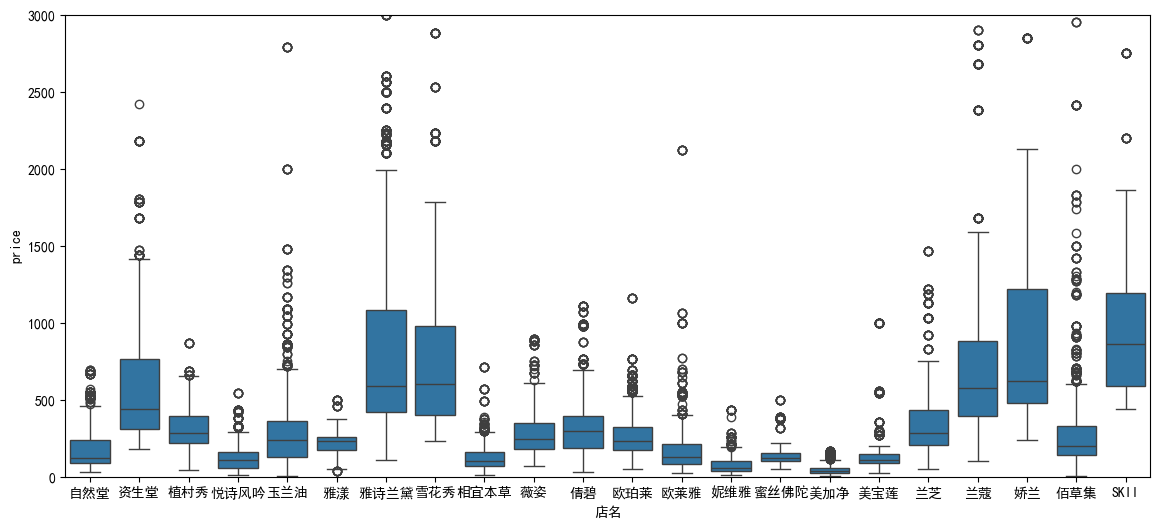

In [27]:
# View the box plot of prices
plt.figure(figsize=(14,6))
sns.boxplot(x='店名',y='price',data=data)
plt.ylim(0,3000) 
# If there are no restrictions, 
# it is not easy to see the box type clearly, 
# so the Y-axis scale is reduced to 0-3000.
plt.show()

In [28]:
# Calculate the average price of each brand
data.groupby('店名').price.sum()
avg_price=data.groupby('店名').price.sum()/data.groupby('店名').price.count()
avg_price

店名
SKII    1011.727079
佰草集      289.823171
倩碧       346.092190
兰芝       356.615809
兰蔻       756.400778
妮维雅       73.789053
娇兰      1361.043588
悦诗风吟     121.245945
植村秀      311.786667
欧珀莱      276.218543
欧莱雅      167.282698
玉兰油      329.657294
相宜本草     122.958446
美加净       44.694619
美宝莲      148.757576
自然堂      180.130213
薇姿       281.085791
蜜丝佛陀     142.118894
资生堂      577.438490
雅漾       212.618401
雅诗兰黛     872.470718
雪花秀      901.082873
Name: price, dtype: float64

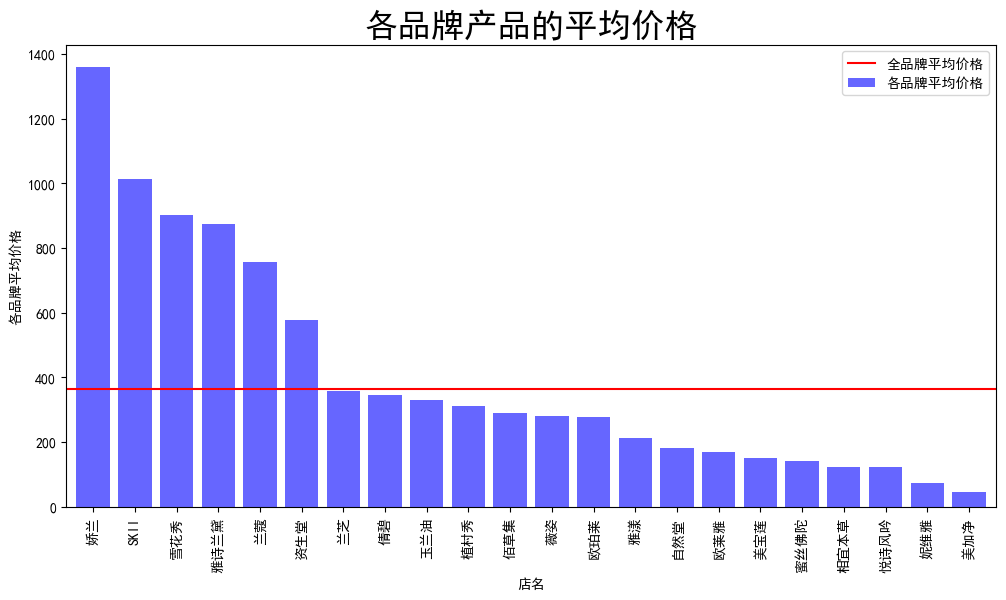

In [29]:
# Define the canvas
fig = plt.figure(figsize=(12,6))
# Sort the average prices of each brand in descending order and display them in the form of a bar chart.
avg_price.sort_values(ascending=False).plot(kind='bar',width=0.8,alpha=0.6,color='b',label='各品牌平均价格')
y = data['price'].mean()
# Display the horizontal line of the average price of all brands
plt.axhline(y,0,5,color='r',label='全品牌平均价格')
plt.ylabel('各品牌平均价格')
plt.title('各品牌产品的平均价格',fontsize=24)
plt.legend(loc='best')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20088\1342643020.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt[i],xy=(x[i],y[i]),xytext = (x[i]+0.2, y[i]+0.2))


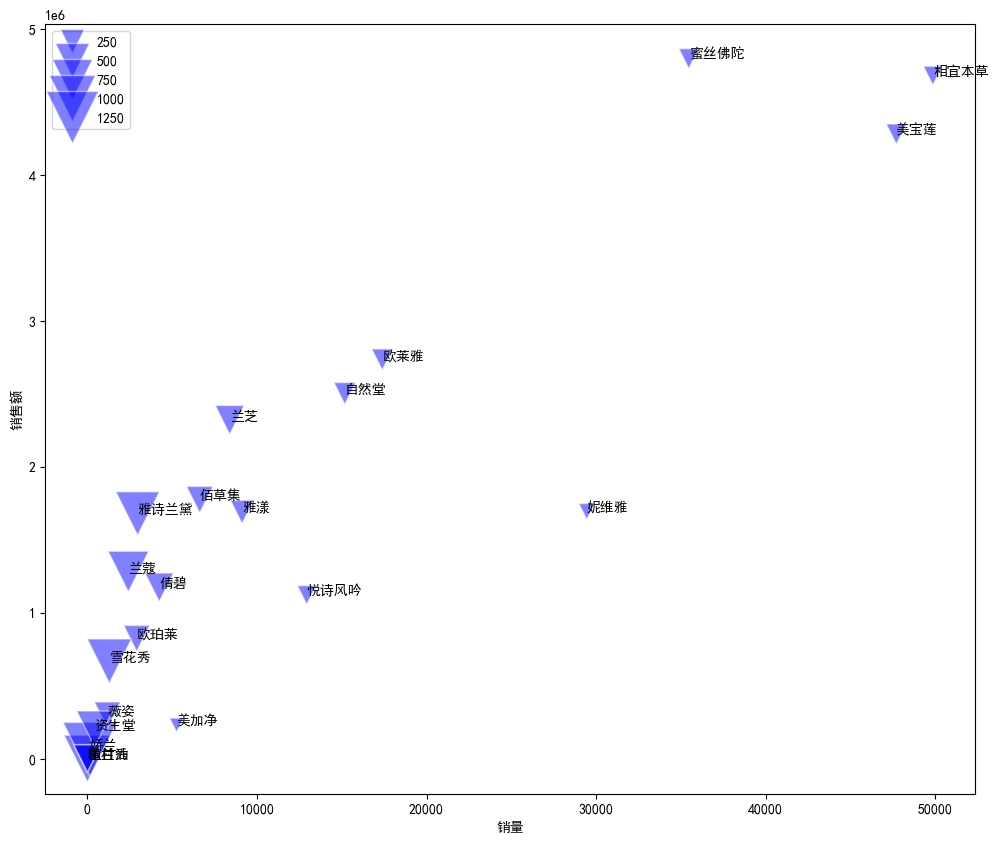

In [30]:
# Use a scatter plot to examine the relationship between sales volume, sales revenue, and price of each brand.
plt.figure(figsize=(12,10))

x = data.groupby('店名')['sale_count'].mean()
y = data.groupby('店名')['销售额'].mean()
s = avg_price
txt = data.groupby('店名').id.count().index
sns.scatterplot(x=x.values, y=y.values, size=s, sizes=(100,1500), marker='v', alpha=0.5, color='b')

for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x[i],y[i]),xytext = (x[i]+0.2, y[i]+0.2))  
    #Add a label with brand information after the scatter points
    
plt.ylabel('销售额')
plt.xlabel('销量')

plt.legend(loc='upper left')
plt.show()

# 6. Sales situation of men's skin care products

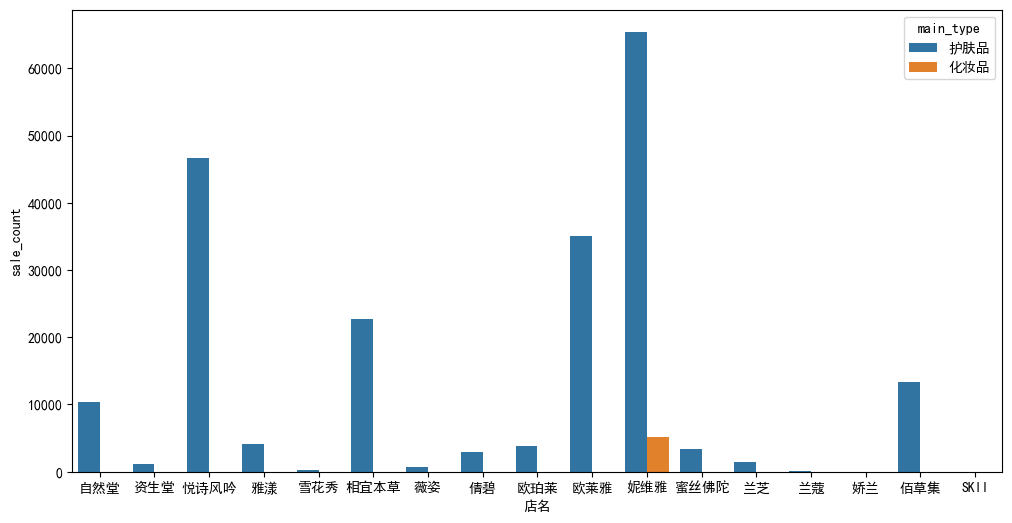

In [32]:
# Filter out men's exclusive products
gender_data=data[data['是否男士专用']=='是']
# Then filter out the skincare and makeup products from men's beauty products.
gender_data_1=gender_data[(gender_data.main_type =='护肤品')| (gender_data.main_type=='化妆品')]
# Create a canvas
plt.figure(figsize = (12,6))
# Create a bar chart
sns.barplot(x='店名',y='sale_count',hue='main_type',data =gender_data_1,saturation=0.75,errorbar=('ci', 0))
# Show
plt.show()

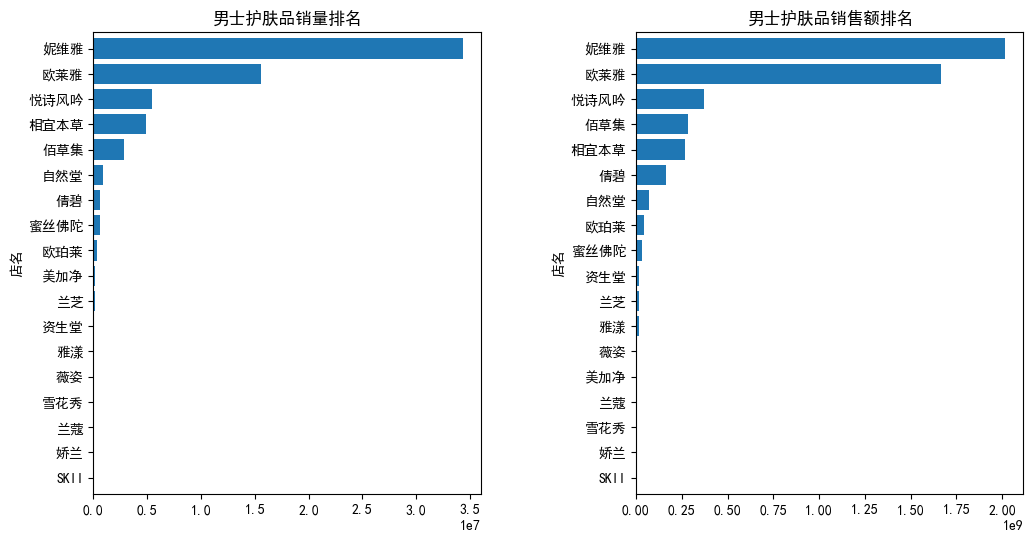

In [33]:
# Further check the sales ranking of men's products
f,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
gender_data.groupby('店名').sale_count.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax1)
ax1.set_title('男士护肤品销量排名')

gender_data.groupby('店名').销售额.sum().sort_values(ascending=True).plot(kind='barh',width=0.8,ax=ax2)
ax2.set_title('男士护肤品销售额排名')

plt.subplots_adjust(wspace=0.4)
plt.show()

# 7. Analyze the relationship between time and sales volume

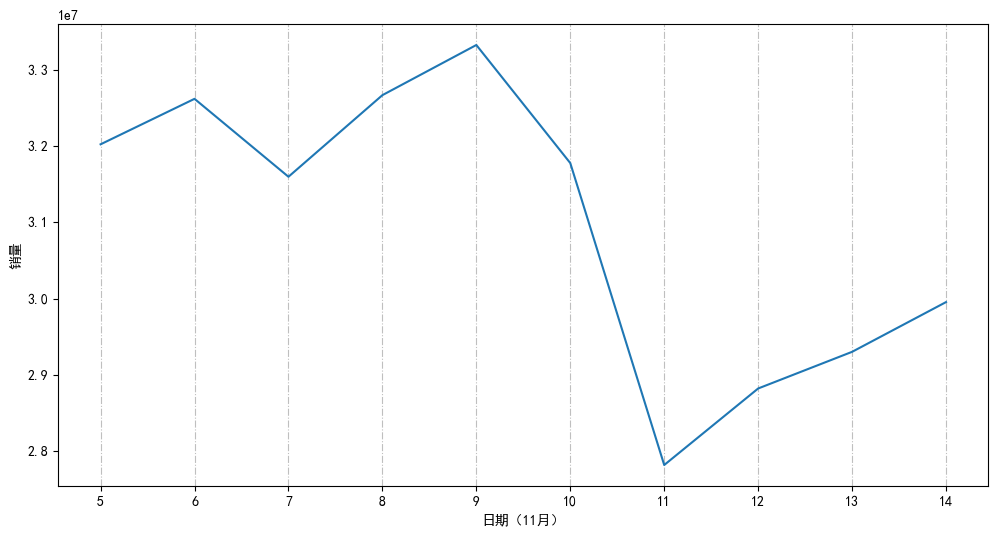

In [34]:
# Import modules related to graph scales
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize = (12,6))
# Obtain sales volume data grouped and summed by date (day)
day_sale=data.groupby('day')['sale_count'].sum()
# Generate charts using the plot method of the pandas library
day_sale.plot()
# Draw grid lines
plt.grid(linestyle="-.",color="gray",axis="x",alpha=0.5)
x_major_locator=MultipleLocator(1)  # Set the tick interval of the x-axis to 1 and store it in a variable.
ax=plt.gca()  # ax is an instance of the two coordinate axes
ax.xaxis.set_major_locator(x_major_locator)
# Set the major tick marks on the x-axis to multiples of 1.
plt.xlabel('日期（11月）')
plt.ylabel('销量')
plt.show()